In [8]:
import kagglehub
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
dataset_path = kagglehub.dataset_download('saurabhshahane/fake-news-classification')

print("Path to dataset files:", dataset_path)

raw_dataset = os.path.join(dataset_path, 'WELFake_Dataset.csv')
df = pd.read_csv(raw_dataset)

print(df.head())

df_clean = df.dropna(subset=["text"])


Path to dataset files: C:\Users\qtg4ys\.cache\kagglehub\datasets\saurabhshahane\fake-news-classification\versions\77
   Unnamed: 0                                              title  \
0           0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
1           1                                                NaN   
2           2  UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...   
3           3  Bobby Jindal, raised Hindu, uses story of Chri...   
4           4  SATAN 2: Russia unvelis an image of its terrif...   

                                                text  label  
0  No comment is expected from Barack Obama Membe...      1  
1     Did they post their votes for Hillary already?      1  
2   Now, most of the demonstrators gathered last ...      1  
3  A dozen politically active pastors came here f...      0  
4  The RS-28 Sarmat missile, dubbed Satan 2, will...      1  


In [3]:
# 1. Split raw text
X_train_text, X_test_text, y_train, y_test = train_test_split(
    df_clean["text"],
    df_clean["label"],
    test_size=0.2,
    stratify=df_clean["label"],
    random_state=42
)

# 2. Fit TF-IDF on TRAIN only
tfidf = TfidfVectorizer(
    stop_words="english",
    max_features=20000,
    ngram_range=(1, 2),
    min_df=5
)

X_train = tfidf.fit_transform(X_train_text)
X_test = tfidf.transform(X_test_text)

# 3. Fit model
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# 4. Evaluate
y_pred = clf.predict(X_test)

Accuracy: 0.9454885914418476
              precision    recall  f1-score   support

           0       0.96      0.93      0.94      7006
           1       0.94      0.96      0.95      7413

    accuracy                           0.95     14419
   macro avg       0.95      0.95      0.95     14419
weighted avg       0.95      0.95      0.95     14419



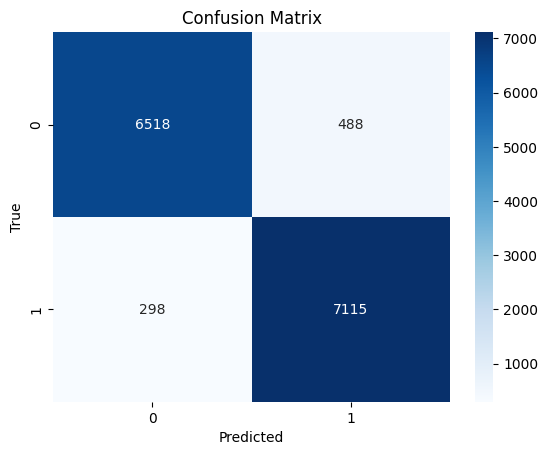

In [9]:
accuracy = accuracy_score(y_test, y_pred)
classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [15]:
feature_names = tfidf.get_feature_names_out()
coefs = clf.coef_[0]

top_fake = sorted(
    zip(feature_names, coefs),
    key=lambda x: x[1],
    reverse=True
)[:20]

top_real = sorted(
    zip(feature_names, coefs),
    key=lambda x: x[1]
)[:20]
print("Top Fake Log-Rec Coefs:", top_fake)
print("\n")
print("Top Real Log-Rec Coefs:", top_real)

Top Fake Log-Rec Coefs: [('featured image', np.float64(9.786212706585458)), ('image', np.float64(9.013482934974657)), ('featured', np.float64(8.902285566412457)), ('twitter com', np.float64(8.365335699471768)), ('hillary', np.float64(7.507095158944185)), ('com', np.float64(6.310265700471941)), ('october', np.float64(6.281446980361039)), ('getty', np.float64(6.197300698887903)), ('getty images', np.float64(5.896997449873893)), ('read', np.float64(5.768738763957822)), ('2016', np.float64(5.60452106676219)), ('watch', np.float64(5.10727202511783)), ('november', np.float64(4.764003253777537)), ('anti', np.float64(4.630186542965266)), ('obama', np.float64(4.186626939771735)), ('just', np.float64(4.1572736397147185)), ('year old', np.float64(3.9720817397067174)), ('source', np.float64(3.858617163215064)), ('today', np.float64(3.839025580184875)), ('entire', np.float64(3.751073047343649))]


Top Real Log-Rec Coefs: [('reuters', np.float64(-24.66144454482489)), ('said', np.float64(-14.82916504

In [19]:
svm = LinearSVC(C=1.0)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9606075317289687
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      7006
           1       0.95      0.97      0.96      7413

    accuracy                           0.96     14419
   macro avg       0.96      0.96      0.96     14419
weighted avg       0.96      0.96      0.96     14419



In [20]:
feature_names = tfidf.get_feature_names_out()
coefs = svm.coef_[0]

top_fake = sorted(
    zip(feature_names, coefs),
    key=lambda x: x[1],
    reverse=True
)[:20]

top_real = sorted(
    zip(feature_names, coefs),
    key=lambda x: x[1]
)[:20]

print("Top Fake SVM Coefs:", top_fake)
print("\n")
print("Top Real SVM Coefs:", top_real)

Top Fake SVM Coefs: [('featured image', np.float64(8.036624393838977)), ('twitter com', np.float64(7.297985811325742)), ('featured', np.float64(5.854730857444867)), ('entire story', np.float64(4.912053226650937)), ('getty', np.float64(4.904391691769416)), ('image', np.float64(4.882056209931099)), ('getty images', np.float64(4.387474893367332)), ('read', np.float64(3.984980014397909)), ('wfb', np.float64(3.9835644716261895)), ('nyp', np.float64(3.733004840507931)), ('october', np.float64(3.514404141423544)), ('hillary', np.float64(3.4514001904975187)), ('com', np.float64(3.4002054988979666)), ('washington times', np.float64(3.311681702008138)), ('anti', np.float64(3.3069388645162165)), ('year old', np.float64(3.083843372999988)), ('november 2016', np.float64(2.963986727059537)), ('flickr', np.float64(2.947692231936898)), ('follow facebook', np.float64(2.94125480967753)), ('november', np.float64(2.8701258145536563))]


Top Real SVM Coefs: [('reuters', np.float64(-15.886837973619569)), ('